# Wine Quality Data Set 

* Data description:Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests

* classification using PCA and KMeans

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import seaborn as sns

# load the data sets

In [166]:
# load both red and white wine
red_wine=pd.read_csv("winequality-red.csv",sep=";")
white_wine=pd.read_csv("winequality-white.csv",sep=";")

# combining the red and white data into one with one variable corresponding to the color of wine

- combine both red and white wine in single table
- new column color

In [171]:
# create a new column called color and concat both the tables
red_wine["color"]="Red"
white_wine["color"]="white"
wine=pd.concat([red_wine,white_wine])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


# Exploring the Wine dataset:

In [43]:
#print the shape and the column name
print(wine.shape)
print(list(wine))

(6497, 13)
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'color']


In [44]:
# Now, let's check the information about different variables/column from the dataset:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


-We can see that there are total 13 columns, out of that 12 columns are of numeric data types. 11 are predictor variables,second last one 'quality' is an response variable and color is object

In [45]:
# Let's look at the summary of the dataset,
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


- check any missing values in the dataset

In [48]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

- check how many unique values does the target feature 'quality' have

In [50]:
wine["quality"].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

- check how data is distributed among those values?

In [53]:
#count the no and sort it index
wine.quality.value_counts().sort_index()

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

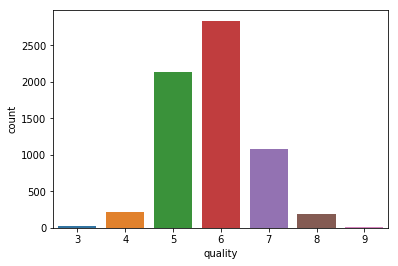

In [59]:
#plot the graph
sns.countplot(x="quality", data=wine)

# Classification

- The above distribution shows the range for response variable (quality) is between 3 to 8.
- create a new discreet, categorical response variable/feature ('rating') from existing 'quality' variable.

 i.e. bad: 1-4
       average: 5-6
        good: 7-10

In [106]:
conditions=[wine["quality"]>7, wine["quality"]<4]
rating=["good","bad"]
wine["rating"]=np.select(conditions,rating,default="average")
print(wine["rating"].value_counts())


average    6269
good        198
bad          30
Name: rating, dtype: int64


# Corelation between features/variables:
-Let's check the corelation between the target variable and predictor variables,

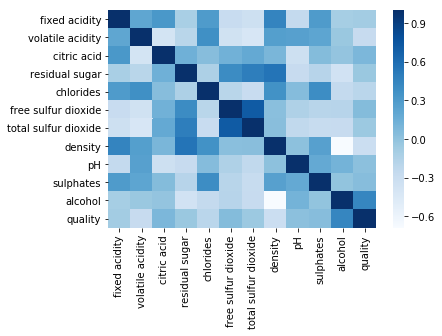

In [81]:
correlations=wine.corr()
plt.figure(figsize=(6,4))
sns.heatmap(correlations,cmap="Blues",annot=False)

- Dark shades represents positive correlation while lighter shades represents negative correlation.
- If you set annot=True, you'll get values by which features are correlated to each other in grid-cells

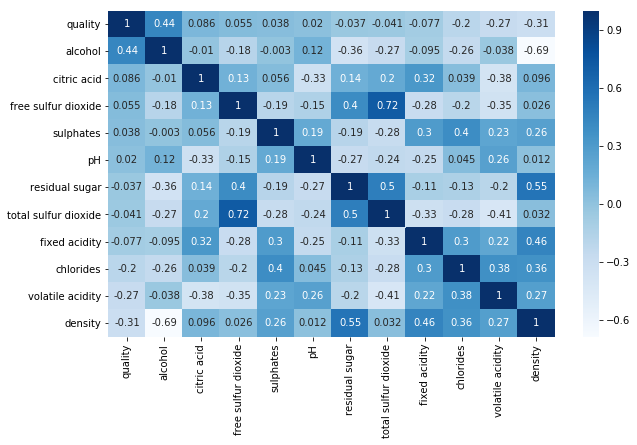

In [93]:
#Quality correlation matrix
k = 12  #number of variables for heatmap
cols=wine.corr().nlargest(k,"quality")["alcohol"].index
col=wine[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(col,annot=True,cmap="Blues")

- Here we can infer that "density" has strong positive correlation with "residual sugar" whereas it has strong negative correlation with "alcohol".

# %Alcohol in Wine

- White wine

In [95]:
#check alchol contain in red white wine
white_wine.groupby("quality")["alcohol"].describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,20.0,10.345000,1.224089,8.0,9.55,10.45,11.00,12.6
4,163.0,10.152454,1.003217,8.4,9.40,10.10,10.75,13.5
5,1457.0,9.808840,0.847065,8.0,9.20,9.50,10.30,13.6
6,2198.0,10.575372,1.147776,8.5,9.60,10.50,11.40,14.0
7,880.0,11.367936,1.246536,8.6,10.60,11.40,12.30,14.2
8,175.0,11.636000,1.280138,8.5,11.00,12.00,12.60,14.0
9,5.0,12.180000,1.013410,10.4,12.40,12.50,12.70,12.9


In [69]:
# same way check for red wine
red_wine.groupby("quality")["alcohol"].describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,10.0,9.955000,0.818009,8.4,9.725,9.925,10.575,11.0
4,53.0,10.265094,0.934776,9.0,9.600,10.000,11.000,13.1
5,681.0,9.899706,0.736521,8.5,9.400,9.700,10.200,14.9
6,638.0,10.629519,1.049639,8.4,9.800,10.500,11.300,14.0
7,199.0,11.465913,0.961933,9.2,10.800,11.500,12.100,14.0
8,18.0,12.094444,1.224011,9.8,11.325,12.150,12.875,14.0


- compare both and show in barplot

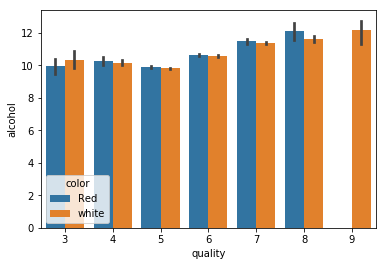

In [72]:
sns.barplot(x="quality", y="alcohol",data=wine,hue="color")


# PCA

In [194]:
# laod red wine datasets 
df=pd.read_csv("winequality-red.csv",sep=";")
model=PCA(n_components=2)
model.fit(df)
wine_2D=model.transform(df)

In [195]:
df["PCA1"]=wine_2D[:,0]
df["PCA2"]=wine_2D[:,1]

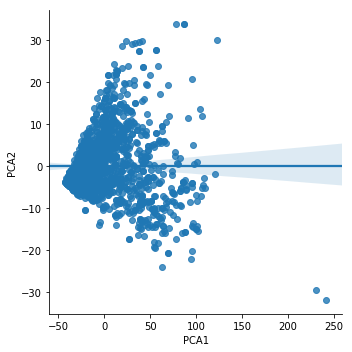

In [196]:
%matplotlib inline
sns.lmplot("PCA1","PCA2",data=df)


# KMeans

In [201]:
from sklearn.cluster import KMeans
cluster_range = range(1,10)
clusters_errors=[]

for num_clusters in cluster_range:
    knn = KMeans(n_clusters=num_clusters)
    knn.fit(df)
    clusters_errors.append(knn.inertia_)

cluster_error = pd.DataFrame({'num_cluster':cluster_range,'cluster_error': clusters_errors})
cluster_error

,num_cluster,cluster_error
0,1,3.819572e+06
1,2,1.375165e+06
2,3,7.820024e+05
3,4,5.576790e+05
4,5,4.337545e+05
5,6,3.461445e+05
6,7,2.911942e+05
7,8,2.564952e+05
8,9,2.245404e+05


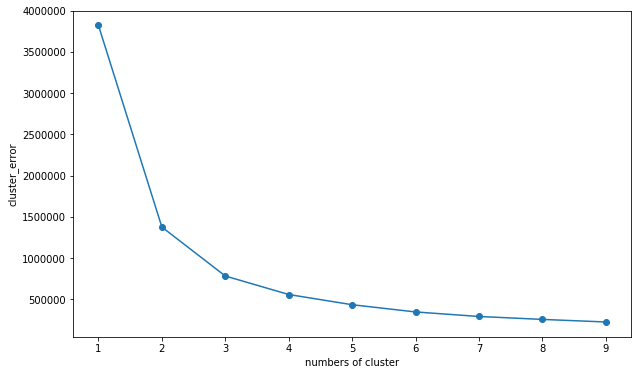

In [202]:
plt.figure(figsize=(10,6))
plt.plot(cluster_df_er.num_cluster, cluster_df_er.cluster_error, marker='o')
plt.xlabel('numbers of cluster')
plt.ylabel('cluster_error')
plt.show()